# Loading & Cleaning data with pandas

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# read .cvs file
article = pd.read_csv('merge_data/articleInfo.csv')
author = pd.read_csv('merge_data/authorInfo.csv')

#merging two files
merge = pd.merge(article, author, on="Article No.")

#filling in NaN values with 0
merge['h-index'] = merge['h-index'].fillna(0)

#correcting mispelling
for x in merge.index:
  if merge.loc[x, "Country"] == "Denamrk":
    merge.loc[x, "Country"] = "Denmark"



# read .xlsx file
#df = pd.read_csv('purchase_data.xlsx')

# Plotting Yearly Publication & Number of Articles

<AxesSubplot: xlabel='Year', ylabel='Citation'>

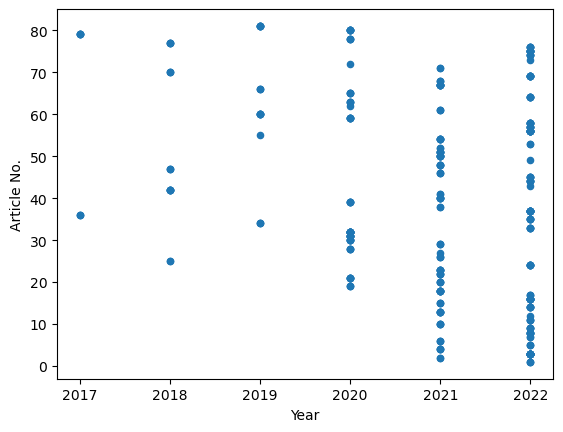

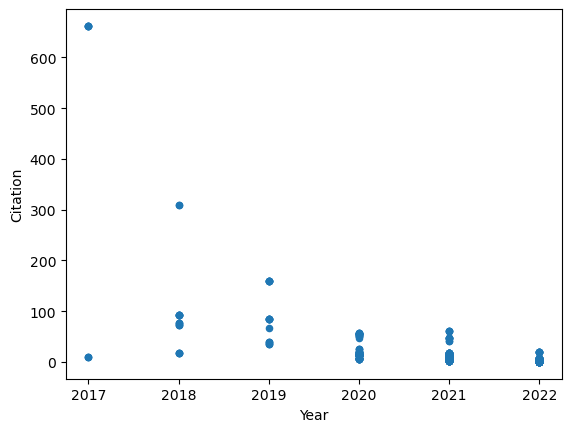

In [104]:
# print descriptive statistics of the data, including mean, standard deviation, median, etc.
#basic_info = df.describe()

merge.plot.scatter(x="Year", y="Article No.")

merge.plot.scatter(x="Year", y="Citation")

# Print data

In [105]:
# display the beginning X rows 
print("The data from the first 5 rows are: \n", merge.head(115))

# display the bottom X rows 
print("The data from the last 5 rows are: \n", merge.tail(115))

The data from the first 5 rows are: 
      Article No.                                              Title  Year  \
0              1  Study of Virtual Reality Immersive Technology ...  2022   
1              1  Study of Virtual Reality Immersive Technology ...  2022   
2              1  Study of Virtual Reality Immersive Technology ...  2022   
3              2  Factors Influencing Nursing Students' Immersiv...  2021   
4              2  Factors Influencing Nursing Students' Immersiv...  2021   
..           ...                                                ...   ...   
110           23  Long-term effectiveness of immersive VR simula...  2021   
111           23  Long-term effectiveness of immersive VR simula...  2021   
112           23  Long-term effectiveness of immersive VR simula...  2021   
113           23  Long-term effectiveness of immersive VR simula...  2021   
114           23  Long-term effectiveness of immersive VR simula...  2021   

     Author Number                   

# Read Data

In [106]:
# read headers
headers = merge.columns

In [107]:
# read each column
new_df = df['']

# only read X rows of that column
new_df = df['Age'][0:5]

# convert column data to a list
age_list = df['Age'].values.tolist()

# read multiple columns
new_df = df[['SN', 'Age', 'Price']]

KeyError: ''

In [39]:
# read a specific row
new_df = df.iloc[1]

# read multiple rows
new_df = df.iloc[1:3]

# read specific location
value = df.iloc[1, 4]

# Locate Specific Data

In [40]:
# locate all customers whose age is seven
new_df = df.loc[df['Age'] == 7]

KeyError: 'Age'

# Sort Data

In [41]:
# sort the data by name (alphabetically)
new_df = df.sort_values('SN');

# sort the data by age
new_df = df.sort_values('Age')

# sort the data by age in a descending way
new_df = df.sort_values('Age', ascending=False)

# sort the data by both name and age, with both in a asceding way
new_df = df.sort_values(['SN', 'Age'])

# sort the data by both name and age, with name in a ascending way but age going from high to low
new_df = df.sort_values(['SN', 'Age'], ascending=[1,0])

KeyError: 'SN'

# Filter Data

In [42]:
# locate all customers whose age is seven
new_df = df.loc[df['Age'] == 7]

# locate with multiple conditions, conditions needed to be seperated by parenthesis
new_df = df.loc[(df['Age'] == 7) & (df['Gender'] == 'Female')]

# locate with multiple conditions, conditions needed to be seperated by parenthesis
new_df = df.loc[(df['Age'] == 7) | (df['Gender'] == 'Female')]

# locate with multiple conditions, conditions needed to be seperated by parenthesis
new_df = df.loc[(df['Age'] > 7) & (df['Gender'] == 'Female')]

# reset index of the newly generated data frame, otherwise the above generated data frames still keep the old index
new_df = new_df.reset_index();

# use drop parameter to avoid the old index added as a new coloum in the new data frame
new_df = new_df.reset_index(drop=True)

# locate all customers whose name contains the string of 'rian'
new_df = df.loc[df['SN'].str.contains('rian')]

# locate all customers whose age is seven
new_df = df.loc[df['Age'].isin({7})]

# locate all customers whose age is either 7, 20, or 35
new_df = df.loc[df['Age'].isin({7, 20, 35})]

# locate all customers whose name DOES NOT contain the string of 'rian'
new_df = df.loc[~df["SN"].str.contains('rian')]

KeyError: 'Age'

# Filtering Data with Regex Expression

In [43]:
import re

# locate all customers whose name contains the string of 'rian' OR 'sim'
new_df = df.loc[df['SN'].str.contains('rian|sim')] # '|' means OR in regex expression

# locate all customers whose name contains the string of 'rian' OR 'sim', include both capital and lowercase cases
new_df = df.loc[df['SN'].str.contains('RIAN|SIM', flags = re.I)] # '|' means OR in regex expression

# locate all customers whose name contains the string of 'rian' OR 'sim'
new_df = df.loc[df['SN'].str.contains('rian|sim')]

# locate all customers whose name starts with 'lis'
new_df = df.loc[df['SN'].str.contains('^lis[a-z]*', flags = re.I)] # '*' means on or more

KeyError: 'SN'

# Aggregate Statistics (Groupby)

In [44]:
# group all customers by age, print the means of different age groups
new_df = df.groupby('Age').mean()

# group all customers by age, print the sum of different age groups
new_df = df.groupby('Age').mean()

# group all customers by age, print the count of different age groups
new_df = df.groupby('Age').count()

# group all customers by age and sort by purchase price
new_df = df.groupby('Age').mean().sort_values('Price')

KeyError: 'Age'

# Working with Large Amounts of Data

In [45]:
# Now if the .csv file is 20 GB, we want to read files with the size that your computer can handle
for df in pd.read_csv('purchase_data.csv', chunksize=5): # use chunksize parameter to only read 5 rows each time
    continue # use the batch of the data to validate or test your model

In [46]:
import seaborn as sns